# Feature description

In [1]:
# Imports
import cv2
import numpy as np
import matplotlib.pyplot as plt

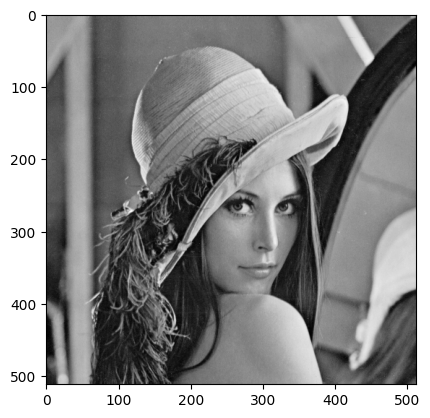

In [2]:
# Load image
image = cv2.imread('../../data/lenna_test_image.png')

# To grayscale
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Show image
plt.imshow(gray, cmap='gray')  
plt.show() 

## HOG feature descriptors

The resulting HOG Descriptor (feature vector), contains the normalized histograms from all cells from all blocks in the detection window concatenated in one long vector. Therefore, the size of the HOG feature vector will be given by the total number of blocks in the detection window, multiplied by the number of cells per block, times the number of orientation bins.

In [3]:
# Create HOG feature descriptor
hog = cv2.HOGDescriptor(_winSize=(64, 128),
                  _blockSize=(16, 16),
                  _blockStride=(8, 8),
                  _cellSize=(8, 8),
                  _nbins=9)

# Compute HOG features
h = hog.compute(image)

# Print result
print ('HOG Descriptor:', h)
print ('HOG Descriptor has shape:', h.shape)

HOG Descriptor: [0.16834342 0.15798853 0.21685353 ... 0.00838798 0.03580478 0.10791165]
HOG Descriptor has shape: (10557540,)


## SIFT feature descriptors

The feature detector returns a list of keypoints: (< cv2.KeyPoint 000001D98B733930>, < cv2.KeyPoint 000001D98B7336F0>, < cv2.KeyPoint 000001D98B733D20>)
The feature descriptor returns a list of feature descriptors for each keypoint: [  0.   1.   0.   1.  58. 153.   0.   0.  29.   0.   0.   1.  15.  69.
   2.  24.  42.   0.   0.   0.   0.   0.   0.  36.   0.   0.   0.   0.
   0.   0.   0.   0.  10.  34.   0.   0.  42. 153.   0.   0.  90.   2.
   0.   0.  54. 153.   9.  19. 153.  17.   0.   0.   1.  13.   5.  47.
  16.   3.   0.   0.   0.   0.   0.   2.  53. 153.   0.   0.   9.  48.
   0.   0.  24.  16.   0.   0.  44. 153.  27.  16. 153.  13.   0.   0.
   3.  54.  34.  68.  31.   5.   1.   4.   4.   0.   0.   3.  74. 153.
   0.   0.   1.   3.   1.   0.  24. 114.   2.   0.   9.  47.  11.   3.
  23.   3.   0.   1.   4.  23.  26.  49.   6.   0.   0.  10.  14.   0.
   0.   6.]
Each SIFT descriptor is a vector of length: 128


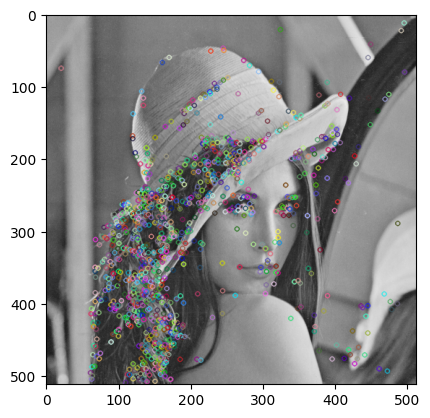

In [4]:
# Create SIFT feature descriptor
sift = cv2.SIFT_create()

# Detect keypoints
kp = sift.detect(gray, None)

# Compute descriptors
des = sift.compute(gray, kp)

# Print result 
print("The feature detector returns a list of keypoints: " + str(kp[0:3]))
print("The feature descriptor returns a list of feature descriptors for each keypoint: " + str(des[1][0]))
print("Each SIFT descriptor is a vector of length: " + str(len(des[1][0])))

# Draw keypoints
cv2.drawKeypoints(gray, kp, image)

# Show result
plt.imshow(image)
plt.show()
